In [1]:
import pandas as pd
import geopandas as gpd
import numpy as np

census_by_community = gpd.read_file('Data/census_by_community1.shp')
grid_data = gpd.read_file('Data/ScooterGridId.shp')
data = pd.read_csv('Data/ScooterData_July15_Sept27_2019.csv')

data_point = data[['startx','starty']].to_numpy()

In [58]:
import progressbar
from shapely.geometry import Polygon, Point

data_from_census = []

for i in progressbar.progressbar(range(len(data_point))):
    for census_i in range(len(census_by_community)):
        if Point(data_point[i]).within(census_by_community.geometry[census_i]) == True :
            cd = census_by_community
            data_from_census.append([cd.apartment[census_i], cd.apt_na[census_i], cd.apt_no_res[census_i], cd.apt_occpd[census_i], cd.apt_owned[census_i], cd.apt_person[census_i]
                                    , cd.apt_uc[census_i], cd.apt_vacant[census_i]
                                    , cd['class'][census_i]
                                    , cd.cnv_na[census_i], cd.cnv_no_res[census_i], cd.cnv_occpd[census_i], cd.cnv_owned[census_i], cd.cnv_person[census_i]
                                    , cd.cnv_uc[census_i], cd.cnv_vacant[census_i]
                                    , cd.comunl_hse[census_i]
                                    , cd.conv_struc[census_i]
                                    , cd.dog_cnt[census_i]
                                    , cd.dup_na[census_i], cd.dup_no_res[census_i], cd.dup_occpd[census_i], cd.dup_owned[census_i], cd.dup_person[census_i]
                                    , cd.dup_uc[census_i], cd.dup_vacant[census_i]
                                    , cd.dwell_cnt[census_i]
                                    , cd.fem_0_4[census_i], cd.fem_5_14[census_i], cd.fem_15_19[census_i], cd.fem_20_24[census_i], cd.fem_25_34[census_i], cd.fem_35_44[census_i]
                                    , cd.fem_45_54[census_i], cd.fem_55_64[census_i], cd.fem_65_74[census_i], cd.fem_75[census_i], cd.female_cnt[census_i]
                                    , cd.male_0_4[census_i], cd.male_5_14[census_i], cd.male_15_19[census_i], cd.male_20_24[census_i], cd.male_25_34[census_i], cd.male_35_44[census_i]
                                    , cd.male_45_54[census_i], cd.male_55_64[census_i], cd.male_65_74[census_i], cd.male_75[census_i], cd.male_cnt[census_i]
                                    , cd.nursing_hm[census_i]
                                    , cd.sing_famly[census_i]
                                    , cd.town_house[census_i], cd.twn_na[census_i], cd.twn_no_res[census_i], cd.twn_occpd[census_i], cd.twn_owned[census_i], cd.twn_person[census_i]
                                    , cd.twn_uc[census_i], cd.twn_vacant[census_i]])
            

  0% (189 of 459478) |                   | Elapsed Time: 0:00:02 ETA:   1:26:00

KeyboardInterrupt: 

In [51]:
data_from_census_numpy = np.array(data_from_census)

In [56]:
np.savetxt("metadata.csv", data_from_census_numpy , delimiter='  ', comments='', fmt='%s') 

In [2]:
date_data = data[['start_date', 'start_hour', 'start_day_of_week']].to_numpy()


In [7]:
np.savetxt("datedata.csv", date_data , delimiter='  ', comments='', fmt='%s') 

100% (459478 of 459478) |################| Elapsed Time: 0:16:02 Time:  0:16:02


Text(0.5, 1.0, 'Clustering GPS Co-ordinates to Form Regions - Weighted')

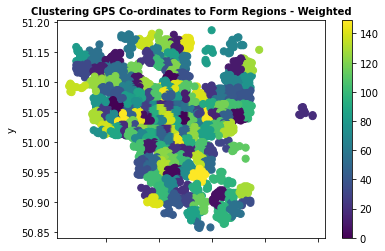

In [20]:
import pandas as pd
import geopandas as gpd
import numpy as np

census_by_community = gpd.read_file('Data/census_by_community1.shp')
grid_data = gpd.read_file('Data/ScooterGridId.shp')
data = pd.read_csv('Data/ScooterData_July15_Sept27_2019.csv')

data_point = data[['startx','starty']].to_numpy()

import progressbar
from shapely.geometry import shape, Polygon, Point
grid_start_coor = []
centeroid_grid = [[round(x.centroid.x,4), round(x.centroid.y,4)] for x in grid_data.geometry]
centeroid_scale_grid = [[x.centroid.x, x.centroid.y] for x in grid_data.geometry]
start_coor = [[round(x.startx,4), round(x.starty,4)] for x in data.itertuples()]
end_coor = [[round(x.endx,4), round(x.endy,4)] for x in data.itertuples()]
dataplot = pd.DataFrame(np.array(centeroid_scale_grid),columns=['x', 'y'])

from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters = 150, max_iter=1000, init ='k-means++')

lat_long = np.array(centeroid_scale_grid)
lot_size = len(centeroid_scale_grid)
weighted_kmeans_clusters = kmeans.fit(lat_long, sample_weight = lot_size) # Compute k-means clustering.
c_group = kmeans.predict(lat_long, sample_weight = lot_size)

start_c_group = []
end_c_group = []

for i in progressbar.progressbar(range(len(start_coor))):
    start = 0
    end = 0
    for j in range(len(centeroid_grid)):
        if start_coor[i][0] == centeroid_grid[j][0] and start_coor[i][1] == centeroid_grid[j][1]:
            start_c_group.append(c_group[j])
            start = 1
        if end_coor[i][0] == centeroid_grid[j][0] and end_coor[i][1] == centeroid_grid[j][1]:
            end_c_group.append(c_group[j])
            end = 1
        if start == 1 and end == 1:
            break

import matplotlib.pyplot as plt

centers = kmeans.cluster_centers_ # Coordinates of cluster centers.
labels = c_group # Labels of each point

dataplot.plot.scatter(x = 'x', y = 'y', c=labels, s=50, cmap='viridis')
# plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)
plt.title('Clustering GPS Co-ordinates to Form Regions - Weighted',fontsize=10, fontweight='bold')

In [21]:
start_cluster_group_np = np.asarray(start_c_group)
start_cluster_group_np = start_cluster_group_np.reshape(len(start_c_group), 1)
end_cluster_group_np = np.asarray(end_c_group)
end_cluster_group_np = end_cluster_group_np.reshape(len(end_c_group), 1)
cluster_group = np.concatenate((start_cluster_group_np, end_cluster_group_np), axis=1)
np.savetxt("Data/cluster_group.csv", cluster_group , delimiter='  ', comments='', fmt='%s') 

In [27]:
cluster_group

array([[ 65, 138],
       [ 65, 138],
       [ 65, 138],
       ...,
       [ 62,   1],
       [ 62,  62],
       [ 62,  62]])

In [5]:
from haversine import haversine
import progressbar
stop_data = pd.read_csv('Data/stops.csv')

start_coor = [[x.startx, x.starty] for x in data.itertuples()]
end_coor = [[x.endx, x.endy] for x in data.itertuples()]
stop_coor = [[x.stop_lon, x.stop_lat] for x in stop_data.itertuples()]

start_isnearbus_c = []
end_isnearbus_c = []
for i in progressbar.progressbar(range(len(start_coor))):
    scount = 0
    ecount = 0
    for j in range(len(stop_coor)):
        haver = haversine([start_coor[i][0], start_coor[i][1]], [stop_coor[j][0], stop_coor[j][1]])
        if haver < 0.030 and scount == 0:
#           start_haver_list.append([haver, j])
            start_isnearbus_c.append(1)
            scount = 1
        haver = haversine([end_coor[i][0], end_coor[i][1]], [stop_coor[j][0], stop_coor[j][1]])
        if haver < 0.030 and ecount == 0:
#           end_haver_list.append([haver, j])
            end_isnearbus_c.append(1)
            ecount = 1
        if scount == 1 and ecount == 1:
            break
    if scount == 0:
        start_isnearbus_c.append(0)
    if ecount == 0:
        end_isnearbus_c.append(0)
#     start_haver_list = np.asarray(start_haver_list)
#     start_haver_list = start_haver_list.reshape(len(start_haver_list),2)
#     end_haver_list = np.asarray(end_haver_list)
#     end_haver_list = end_haver_list.reshape(len(end_haver_list),2)
#     if len(start_haver_list) > 0 :
#         start_isnearbus_c.append(start_haver_list[np.argmin(start_haver_list[:,0]), 1])
#     else:
#         start_isnearbus_c.append(-1)
#     if len(end_haver_list) > 0 :
#         end_isnearbus_c.append(end_haver_list[np.argmin(end_haver_list[:,0]), 1])
#     else:
#         end_isnearbus_c.append(-1)

100% (459478 of 459478) |################| Elapsed Time: 5:21:39 Time:  5:21:39


In [6]:
coor_data = data[['startx', 'starty', 'endx', 'endy']].to_numpy()
# start_c_group = np.asarray(start_c_group)
# start_c_group = start_c_group.reshape(len(start_c_group), 1)
start_isnearbus_c_np = np.asarray(start_isnearbus_c)
start_isnearbus_c_np = start_isnearbus_c_np.reshape(len(start_isnearbus_c), 1)
end_isnearbus_c_np = np.asarray(end_isnearbus_c)
end_isnearbus_c_np = end_isnearbus_c_np.reshape(len(end_isnearbus_c), 1)
# coor_data = np.concatenate((coor_data, start_c_group), axis=1)
# coor_data = np.concatenate((coor_data, start_isnearbus_c_np), axis=1)
bus_stop = np.concatenate((start_isnearbus_c_np, end_isnearbus_c_np), axis=1)
np.savetxt("Data/bus_stop.csv", bus_stop , delimiter='  ', comments='', fmt='%s') 

In [22]:
start_isnearbus_c_np

array([[1],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])